In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"D:\Pyhton Devlopment\02_House_Price_Prediction_Linear_Regression\1553768847-housing.csv")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.info()          # Data types & nulls
df.describe()      # Statistical summary
df.isnull().sum()  # Missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [4]:
df.dropna(inplace=True)  # Removing rows with null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [5]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
train_data = X_train.join(y_train)
train_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14,4412,924.0,2698,891,4.7027,<1H OCEAN,227600
2057,-119.63,36.64,33,1036,181.0,620,174,3.4107,INLAND,110400
6453,-118.06,34.12,25,3891,848.0,1848,759,3.6639,INLAND,248100
4619,-118.31,34.07,28,2362,949.0,2759,894,2.2364,<1H OCEAN,305600
15266,-117.27,33.04,27,1839,392.0,1302,404,3.5500,NEAR OCEAN,214600


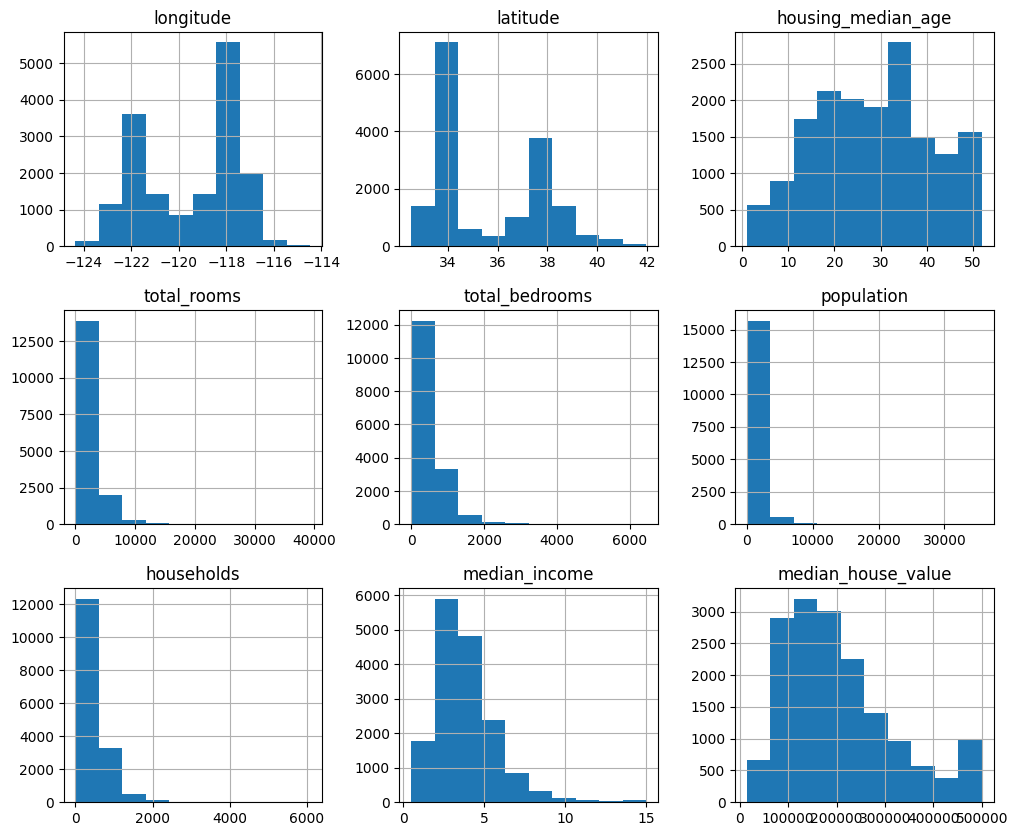

In [7]:
train_data.hist(figsize=(12,10))
plt.show()


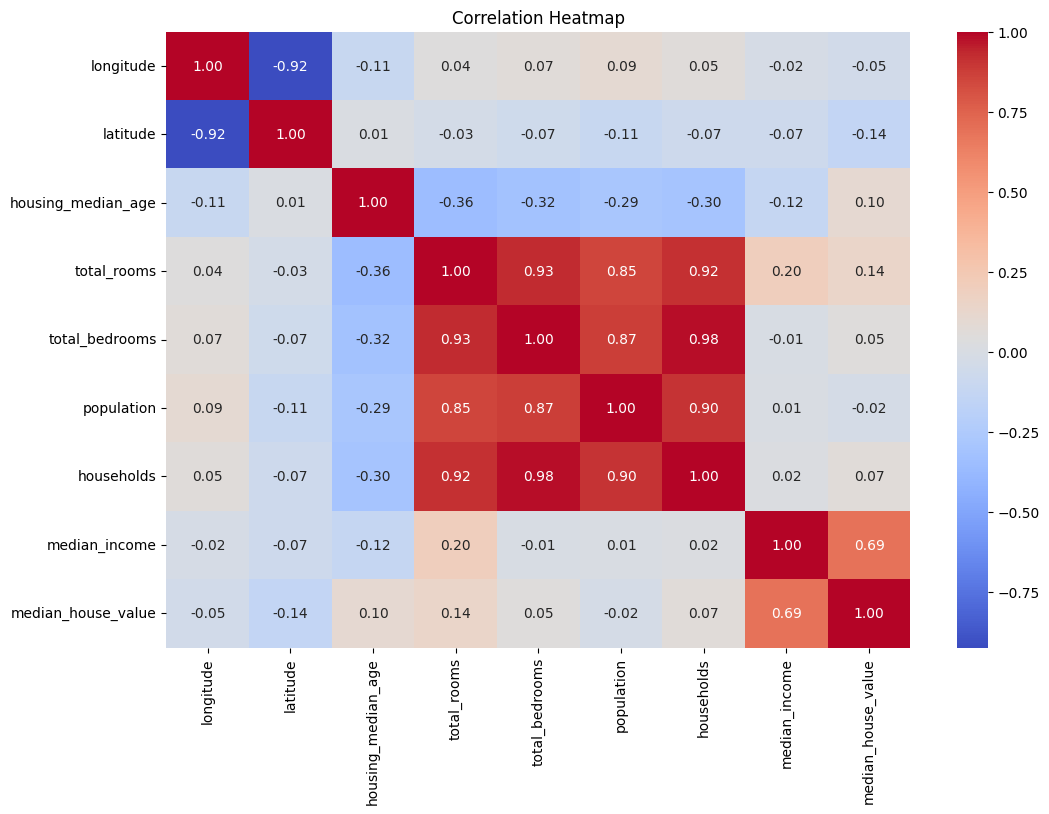

In [8]:
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


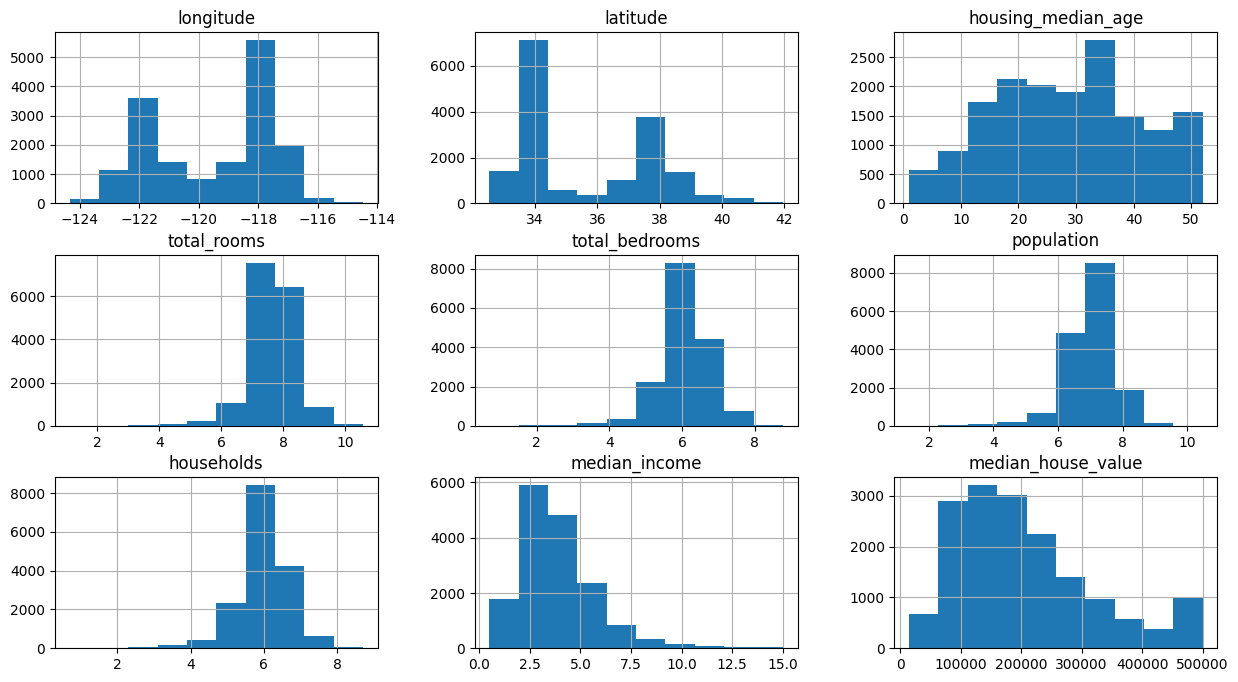

In [9]:
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[col] = np.log(train_data[col] + 1)

train_data.hist(figsize=(15,8))
plt.show()


In [10]:
train_data['ocean_proximity'].value_counts()

# One-hot encoding
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], drop_first=True))
train_data.drop('ocean_proximity', axis=1, inplace=True)


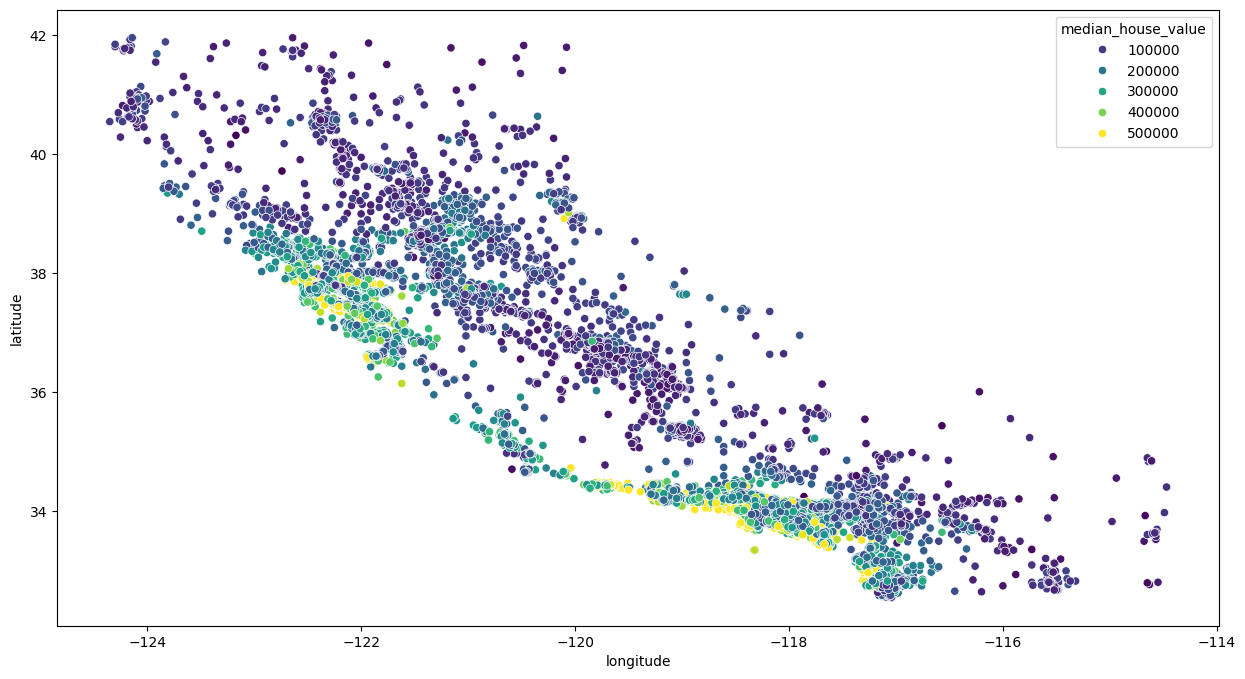

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="longitude",
    y="latitude",
    hue="median_house_value",
    data=train_data,
    palette="viridis"
)
plt.show()


In [12]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['households']
train_data['room_ratio'] = train_data['total_rooms'] / train_data['households']


In [13]:
X_train_final = train_data.drop('median_house_value', axis=1)
y_train_final = train_data['median_house_value']

X_train_final.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,room_ratio
17727,-121.80,37.32,14,8.392310,6.829794,7.900637,6.793466,4.7027,False,False,False,False,1.005347,1.235350
2057,-119.63,36.64,33,6.944087,5.204007,6.431331,5.164786,3.4107,True,False,False,False,1.007594,1.344506
6453,-118.06,34.12,25,8.266678,6.744059,7.522400,6.633318,3.6639,True,False,False,False,1.016695,1.246236
4619,-118.31,34.07,28,7.767687,6.856462,7.922986,6.796824,2.2364,False,False,False,False,1.008774,1.142841
15266,-117.27,33.04,27,7.517521,5.973810,7.172425,6.003887,3.5500,False,False,False,True,0.994990,1.252109


In [14]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


In [15]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [17]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [18]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


In [21]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


In [26]:
model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 50413.433308100364
RMSE: 69297.7166911303
R2 Score: 0.6488402154431994


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validation R2 scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


Cross-validation R2 scores: [0.5022867  0.51131387 0.60000361 0.49898186 0.69773117]
Average CV R2: 0.5620634399947505


C:\Users\Nived\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [30]:
from sklearn.ensemble import RandomForestRegressor


In [31]:
("regressor", RandomForestRegressor(n_estimators=200, random_state=42))


('regressor', RandomForestRegressor(n_estimators=200, random_state=42))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}


In [34]:
from sklearn.metrics import r2_score

scores = {}

for name, reg in models.items():
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("model", reg)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    
    scores[name] = r2
    print(f"{name} R2 Score: {r2:.4f}")


Linear Regression R2 Score: 0.6488
Decision Tree R2 Score: 0.6651
Random Forest R2 Score: 0.8262
Gradient Boosting R2 Score: 0.7660
Support Vector Regressor R2 Score: -0.0493
KNN Regressor R2 Score: 0.7162


In [35]:
score_df = pd.DataFrame(scores.items(), columns=["Model", "R2 Score"])
score_df = score_df.sort_values(by="R2 Score", ascending=False)
score_df


,Model,R2 Score
2,Random Forest,0.826171
3,Gradient Boosting,0.766030
5,KNN Regressor,0.716169
1,Decision Tree,0.665077
0,Linear Regression,0.648840
4,Support Vector Regressor,-0.049270


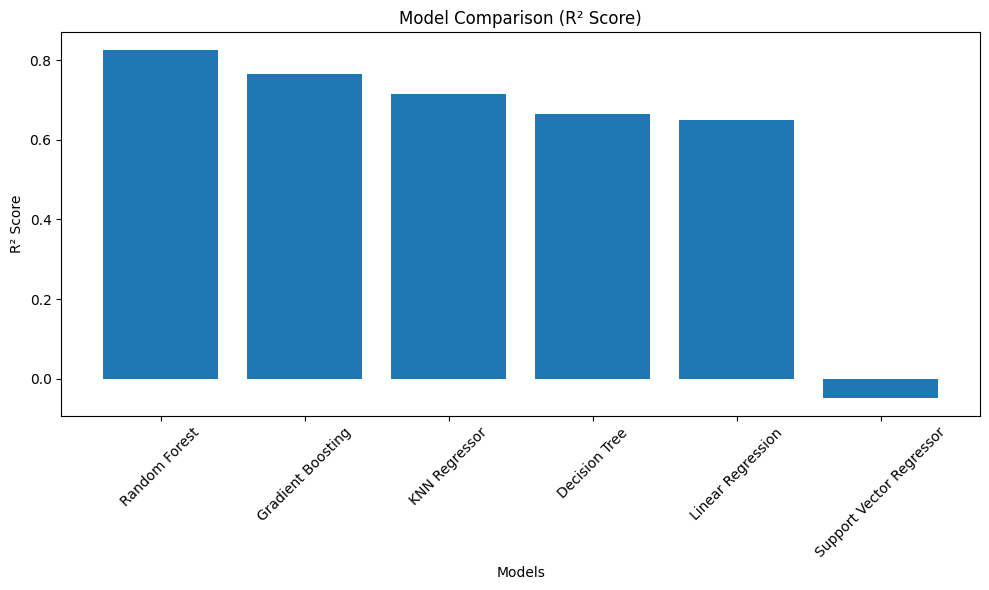

In [36]:
plt.figure(figsize=(10,6))
plt.bar(score_df["Model"], score_df["R2 Score"])
plt.xticks(rotation=45)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV


In [38]:
best_model_name = score_df.iloc[0]["Model"]
print("Best Model:", best_model_name)


Best Model: Random Forest


In [39]:
best_models_map = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

best_model = best_models_map[best_model_name]


In [40]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", best_model)
])


In [41]:
final_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [42]:
import joblib

joblib.dump(final_pipeline, "house_price_model.joblib")
print("Model saved successfully!")


Model saved successfully!


In [43]:
import joblib

model = joblib.load("house_price_model.joblib")


In [44]:
sample = X_test.iloc[[0]]   # single house
prediction = model.predict(sample)
print("Predicted House Price:", prediction[0])


Predicted House Price: 228602.015
